# Исследование определяющих успешность игры закономерностей



# Введение: 
На основании исторических данных о продажах игр, оценках пользователей и экспертов, жанров и платформ, полученных из открытых источников необходимо выявить определяющие успешность игры закономерности и проверить ряд гиротиз. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

```
Гипотизы: 
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action и Sports разные.
```

## Откроем файл с данными и изучим общую информацию. 

In [1]:
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('/games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
data.head(10)

In [ ]:
data.describe(include='all')

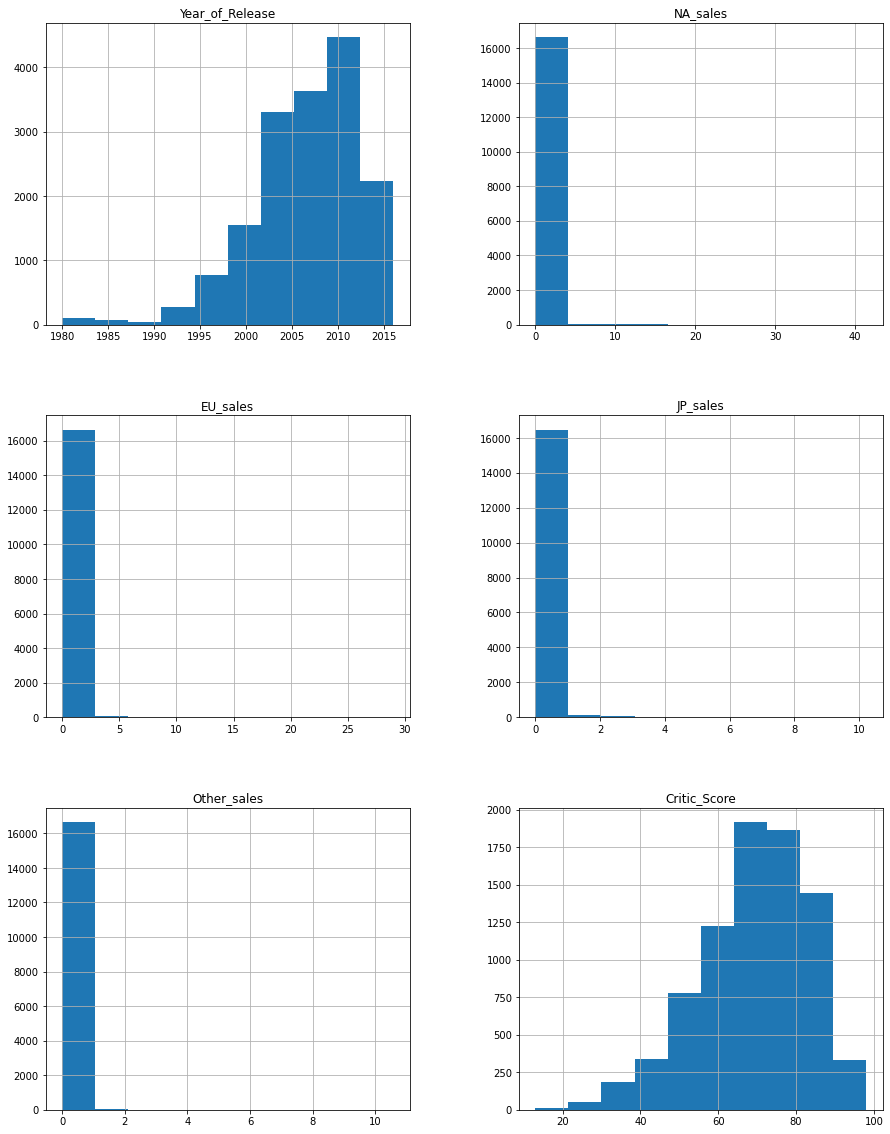

In [6]:
data.hist(figsize=(15, 20))
plt.show()

Как мы видим DataFrame состоит из 11 столбцов с информацией двух типов float и object, при этом в столбцах User_Score и Year_of_Release тип указан неверно, в таблице содержится большое число пустых строк. DataFrame нуждается в предароботке. 

## Предароботка данных. 

### приведем названия столбцов к нижнему регистру

In [7]:
data.columns = map(str.lower, data.columns)

### Проверим DataFrame на наличие пропусков

In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Text(0.5, 1.0, 'Расположение пропусков в DataFrame')

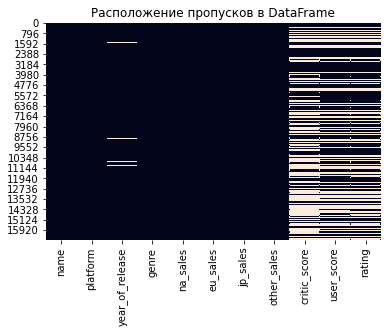

In [9]:
sns.heatmap(data.isnull(), cbar = False)
plt.title('Расположение пропусков в DataFrame')

Как видно из heatmap пропуски в основном находятся в столлбцах с оценками и возрастным рейтингом, так же имеются несколько пропусков в стобце с годами выпуска

### Преобразуем данные в нужные типы и удалим пропуски

In [10]:
data['year_of_release'] = data['year_of_release'].astype("Int64")
data['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

Мы осуществили замену типа данных в столбце 'year_of_release', чтобы откинуть ненужные нули 

In [11]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [12]:
data[data['user_score'] == 'tbd']['user_score'].count()

2424

In [ ]:
data[data['user_score'] == 'tbd'].head(10)

In [14]:
def make_float(income):
    if income == '8':
        return '8.0'
    elif income == '9':
        return '9.0'
    elif income == '7':
        return '7.0'
    elif income == '5':
        return '5.0'
    elif income == 'tbd':
        return '0.0'
    elif income == '4':
        return '4.0'
    elif income == '6':
        return '6.0'
    elif income == '3':
        return '3.0'
    elif income == '2':
        return '2.0'
    elif income == '1':
        return '1.0'
    elif income == '0':
        return '0.0'
    else:
        return income

In [15]:
data.user_score = data.user_score.apply(make_float)
data['user_score'].unique()

array(['8.0', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9.0', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8',
       '3.2', '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7.0',
       '7.3', '4.3', '7.6', '5.7', '5.0', '9.1', '6.5', '0.0', '8.8',
       '6.9', '9.4', '6.8', '6.1', '6.7', '5.4', '4.0', '4.9', '4.5',
       '9.3', '6.2', '4.2', '6.0', '3.7', '4.1', '5.8', '5.6', '5.5',
       '4.4', '4.6', '5.9', '3.9', '3.1', '2.9', '5.2', '3.3', '4.7',
       '5.1', '3.5', '2.5', '1.9', '3.0', '2.7', '2.2', '2.0', '9.5',
       '2.1', '3.6', '2.8', '1.8', '3.8', '1.6', '9.6', '2.4', '1.7',
       '1.1', '0.3', '1.5', '0.7', '1.2', '2.3', '0.5', '1.3', '0.2',
       '0.6', '1.4', '0.9', '1.0', '9.7'], dtype=object)

In [16]:
data['user_score'] = data['user_score'].astype (float)

В столбце 'user_score' мы осуществили перевод строковых значений в числовые, для этого пришлось заменить нетипичное значение 'tbd' на медианное значение, расчитав его для каждой платформы отдельно.

In [17]:
data['name'] = data['name'].fillna('unknow_name') 

In [18]:
data['rating'] = data['rating'].fillna('unknow_rating') 

In [19]:
data['genre'] = data['genre'].fillna('unknow_genre') 

In [20]:
data['year_of_release'] = data['year_of_release'].fillna(0) 

В столбце 'year_of_release' осуществлена замена на нехарактерное значение (0).
В столбцах с типом данных object пропуски заполены строкой 'unknow_...' (где многоточие - название столбца)


In [21]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating                0
dtype: int64

Предлагаю заменить пропущенные значения в столбцах 'critic_score' и 'user_score' на 0.0

In [22]:
data['critic_score'] = data['critic_score'].fillna(0.0)
data['user_score'] = data['user_score'].fillna(0.0) 

In [23]:
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Осуществим поиск дубликатов

In [24]:
data.duplicated().sum()

0

In [25]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [26]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', 'unknow_genre'], dtype=object)

In [27]:
data['rating'].unique()

array(['E', 'unknow_rating', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Явных и неявных дубликатов не обнаружено.

### Добавим новые столбцы в DataFrame.

Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец

In [28]:
data['sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [ ]:
data.head(10)

Добавим категории для оценок пользователей и критиков

In [30]:
def categorize(income):
    try:
        if income == 0.0:
            return '0'
        elif 0.0 < income <= 10.0:
            return '1'
        elif 10.0 < income <= 20.0:
            return '2'
        elif 20.0 < income <= 30.0:
            return '3'
        elif 30.0 < income <= 40.0:
            return '4'
        elif 40.0 < income <= 50.0:
            return '5'
        elif 50.0 < income <= 60.0:
            return '6'
        elif 60.0 < income <= 70.0:
            return '7'
        elif 70.0 <= income <= 80.0:
            return '8'
        elif income > 80.0:
            return '9'
    except:
        pass

In [31]:
data['critic_score_category'] = data['critic_score'].apply(categorize)

In [32]:
data['user_score_category'] = data['user_score'].round(0).astype("Int64")

## Проведем исследовательский анализ данных

### Посмотрим сколько игр выпускалось в разные годы. 

In [33]:
game_from_years = data.query('year_of_release != 0').pivot_table(
        index='year_of_release', values='name', aggfunc='count')
game_from_years.columns = ['how_many_games']
game_from_years

,how_many_games
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Text(0.5, 1.0, 'Cколько игр выпускалось в разные годы')

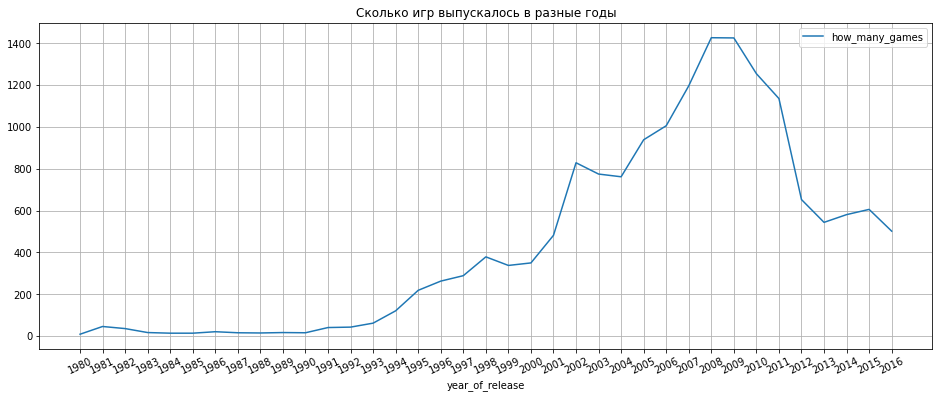

In [34]:
game_from_years.plot(y="how_many_games", xticks = list(game_from_years.index), fontsize=10, figsize=(16, 6), grid = True)
plt.xticks(rotation = 25)
plt.title('Cколько игр выпускалось в разные годы')

Как мы видим из графика и сводной таблицы с 1991 по 2008 годы наблюдается резкий рост числа выпускаемых игр с 16 в 1990 году до 1427 игр в 2008, затем  с 2009 произошел резкий спад с 1426 до 502,  данное обстоятельство может объясняться финансовым кризисом и последовавшим за ним кризисом игровой индустрии. С 1980 по 1991 число игр  не превышало 40 единиц, за исключением 1981 (46 единиц), однако к 1983 число выпущенных игр опустилось до 17 игр, данный спад может быть объяснен кризисом индустрии игр 1983 года (и выходом в 1982 году игры "E.T. the Extra-Terrestrial" для  игровой приставки Atari 2600 как его символа). 


### Выберим платформы с наибольшими суммарными продажами по годам. 

In [ ]:
pd.pivot_table(data.query(
    'year_of_release != 0 and platform in ["2600", "NES", "3DO", "GG", "NG", "PCFX" "SCD", "TG16"]'), 'sales', 'platform', 'year_of_release', aggfunc = 'sum')

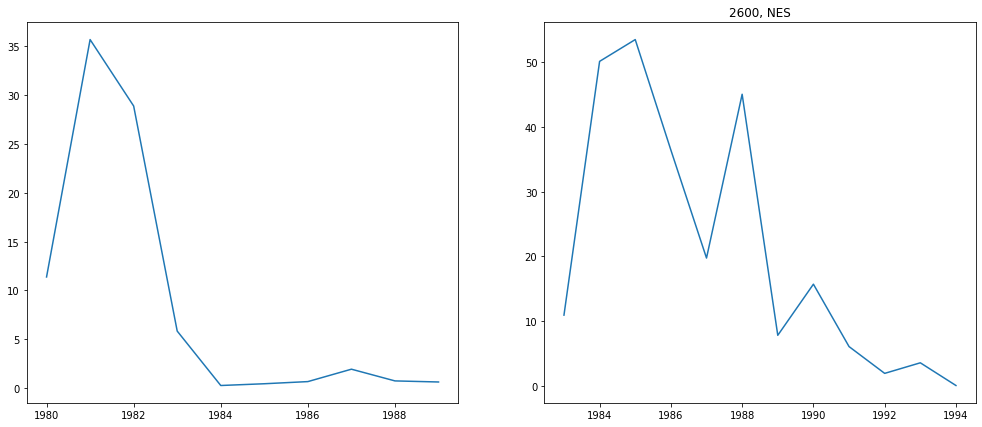

In [36]:
sales_2600 = data.query('year_of_release != 0 and year_of_release <= 1989 and platform in ["2600"]').pivot_table(
        index='year_of_release', values='sales', aggfunc='sum')
sales_NES = data.query('year_of_release != 0 and platform in ["NES"]').pivot_table(
        index='year_of_release', values='sales', aggfunc='sum')

fig, ax = plt.subplots(1,2, figsize=(17, 7))
ax[0].plot(sales_2600.index, sales_2600['sales'])
ax[1].plot(sales_NES.index, sales_NES['sales'])
plt.title('2600, NES')
plt.show()

In [ ]:
pd.pivot_table(data.query(
    'year_of_release > 1988 and year_of_release < 1997'), 'sales', 'platform', 'year_of_release', aggfunc = 'sum')


Как мы видим век большинства первых консолей был недолог, только только 2 платформы из 6 просуществовали более 3 лет, в итоге позиции  Atari 2600 подорвал неудачный релиз "E.T. the Extra-Terrestrial", а продажи игр на NES упали в 1990 со стартом продаж игр на Super Nintendo Entertainment System.

In [ ]:
pd.pivot_table(data.query(
    'year_of_release > 1996'), 'sales', 'platform', 'year_of_release', aggfunc = 'sum')

Text(0.5, 1.0, 'PS')

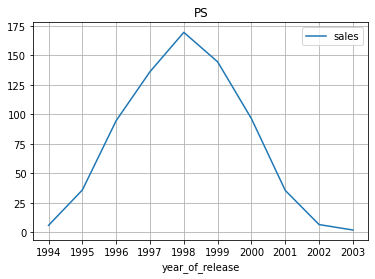

In [39]:
sales_ps = data.query('year_of_release != 0 and platform in ["PS"]').pivot_table(
        index='year_of_release', values='sales', aggfunc='sum')
sales_ps.plot(y="sales", xticks = list(sales_ps.index), grid = True)
plt.title('PS')

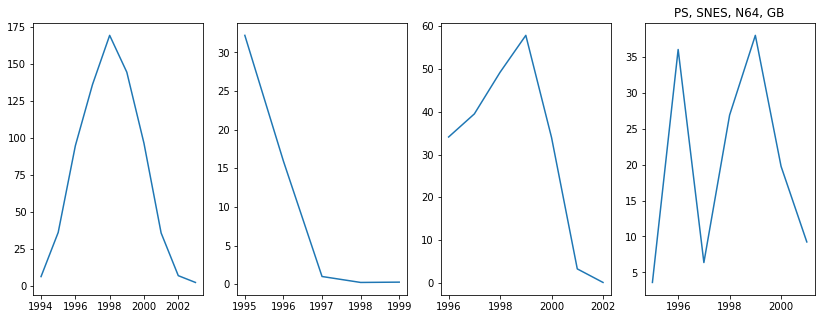

In [40]:
sales_snes = data.query('year_of_release > 1994 and year_of_release < 2003 and platform in ["SNES"]').pivot_table(
        index='year_of_release', values='sales', aggfunc='sum')
sales_n64 = data.query('year_of_release > 1994 and year_of_release < 2003 and platform in ["N64"]').pivot_table(
        index='year_of_release', values='sales', aggfunc='sum')
sales_gb = data.query('year_of_release > 1994 and year_of_release < 2003 and platform in ["GB"]').pivot_table(
        index='year_of_release', values='sales', aggfunc='sum')


fig, ax = plt.subplots(1,4, figsize=(14, 5))

ax[0].plot(sales_ps.index, sales_ps['sales'])

ax[1].plot(sales_snes.index, sales_snes['sales'])
ax[2].plot(sales_n64.index, sales_n64['sales'])
ax[3].plot(sales_gb.index, sales_gb['sales'])
plt.title('PS, SNES, N64, GB')
plt.show()

Как мы видим в 1994 начинают выходить игры на PS и их продажи в короткий срок выходят на уровень недосигаемый для конкурентов, но с 2001 начинают так же резко падать.

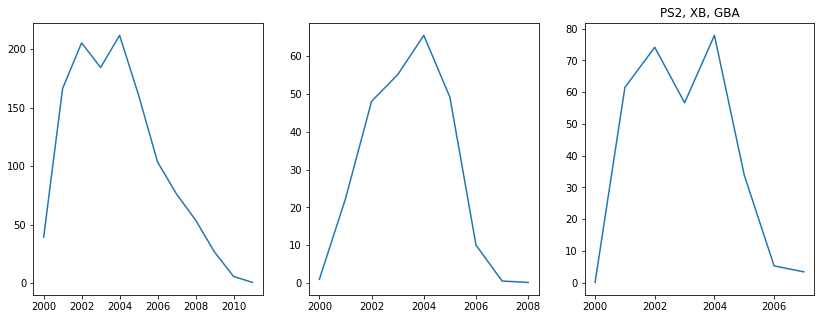

In [41]:
sales_ps2 = data.query('year_of_release > 1994 and platform in ["PS2"]').pivot_table(
        index='year_of_release', values='sales', aggfunc='sum')
sales_xb = data.query('year_of_release > 1994 and platform in ["XB"]').pivot_table(
        index='year_of_release', values='sales', aggfunc='sum')
sales_gba = data.query('year_of_release > 1994 and platform in ["GBA"]').pivot_table(
        index='year_of_release', values='sales', aggfunc='sum')


fig, ax = plt.subplots(1,3, figsize=(14, 5))

ax[0].plot(sales_ps2.index, sales_ps2['sales'])
ax[1].plot(sales_xb.index, sales_xb['sales'])
ax[2].plot(sales_gba.index, sales_gba['sales'])
plt.title('PS2, XB, GBA')
plt.show()

Как мы видим падение продаж игр на PS связанно с выходом нового поколения консоли (PS2), продажи игр на которую попрежнему недостижимы для конкурентов. В 2007 начинается их падение.

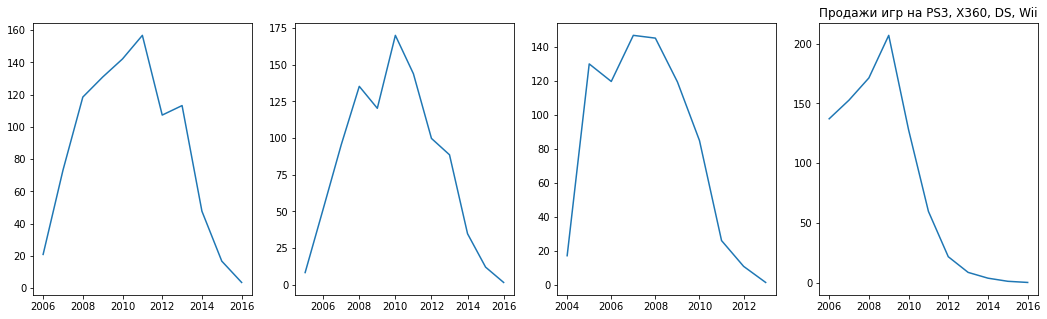

In [42]:
sales_ps3 = data.query('year_of_release > 1994 and platform in ["PS3"]').pivot_table(
        index='year_of_release', values='sales', aggfunc='sum')
sales_x360 = data.query('year_of_release > 1994 and platform in ["X360"]').pivot_table(
        index='year_of_release', values='sales', aggfunc='sum')
sales_ds = data.query('year_of_release > 1994 and platform in ["DS"]').pivot_table(
        index='year_of_release', values='sales', aggfunc='sum')
sales_wii = data.query('year_of_release > 1994 and platform in ["Wii"]').pivot_table(
        index='year_of_release', values='sales', aggfunc='sum')

fig, ax = plt.subplots(1,4, figsize=(18, 5))

ax[0].plot(sales_ps3.index, sales_ps3['sales'])
ax[1].plot(sales_x360.index, sales_x360['sales'])
ax[2].plot(sales_ds.index, sales_ds['sales'])
ax[3].plot(sales_wii.index, sales_wii['sales'])
plt.title('Продажи игр на PS3, X360, DS, Wii')
plt.show()

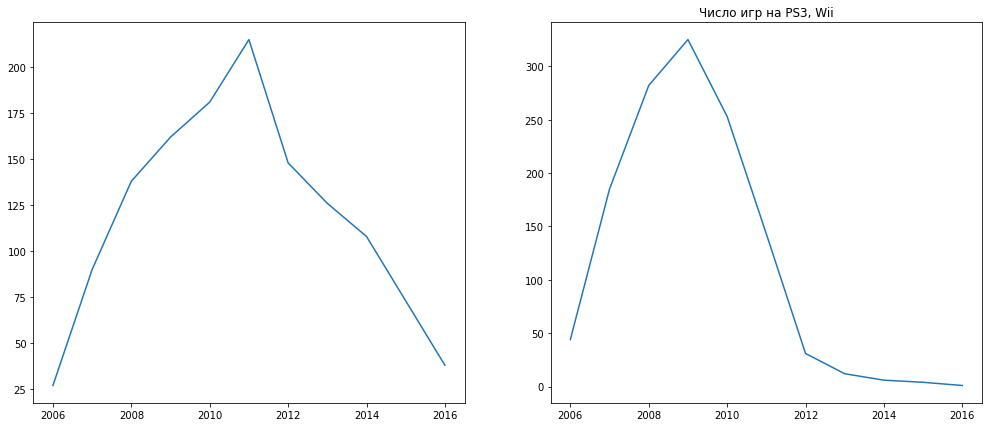

In [43]:
count_ps3 = data.query('year_of_release > 1994 and platform in ["PS3"]').pivot_table(
        index='year_of_release', values='name', aggfunc='count')
count_wii = data.query('year_of_release > 1994 and platform in ["Wii"]').pivot_table(
        index='year_of_release', values='name', aggfunc='count')

fig, ax = plt.subplots(1,2, figsize=(17, 7))
ax[0].plot(count_ps3.index, count_ps3['name'])
ax[1].plot(count_wii.index, count_wii['name'])
plt.title('Число игр на PS3, Wii')
plt.show()

Как мы видим падение продаж игр на PS2 также связанно с выходом нового поколения консоли (PS3), такое наблюдение справедливо и приментиельно к консолям XB и X360. 2006 год ознаменовал конец монополии PS3 и стартом началом настоящей консольной войны, при этом продажи игр на X360 стартовали на год раньше PS3, что в совокупности с более низкой ценой на саму консоль (300$ против 500$) возможно и обеспечили лучшие продажи игр, кроме того разработка игр на PS3 поначалу оказалось сложной для разработчиков, например Геййб Ньюээлл говорил об этом процессе, как о "в пустую потраченном для всех времени". Крайне интересно распределение значений в случае с Wii где продажи с первого года были крайне высокими, но затем в период с 2010 по 2014 годы резко рухнули, такое распределение может быть связанно с иновационностью консоли (покрайней мере таковой ее позиционировали на выставке Е3), низкой ценой по сравнениюю с конкурентами (200$), причинами падения может быть отсутствие интереса среди разроботчиков игр.

In [44]:
wiigames_from_years = data.query('year_of_release > 1994 and platform in ["Wii"]').pivot_table(
        index='year_of_release', values='name', aggfunc='count')
wiigames_from_years.columns = ['how_many_games']
wiigames_from_years

,how_many_games
year_of_release,
2006,44
2007,185
2008,282
2009,325
2010,253
2011,143
2012,31
2013,12
2014,6


Да, печально. Слабое "железо" и уникальность платформы, создающая сложности в порте игр на другие платформы похоже отпугнули разработчиков. Продажи от одной игры не будут такими же как от 325 даже если это Just Dance 2017. Кроме того в 2010 году X360 и PS3 выпустили свои версии подвижных игр, а в 2012 вышла WiiU. 

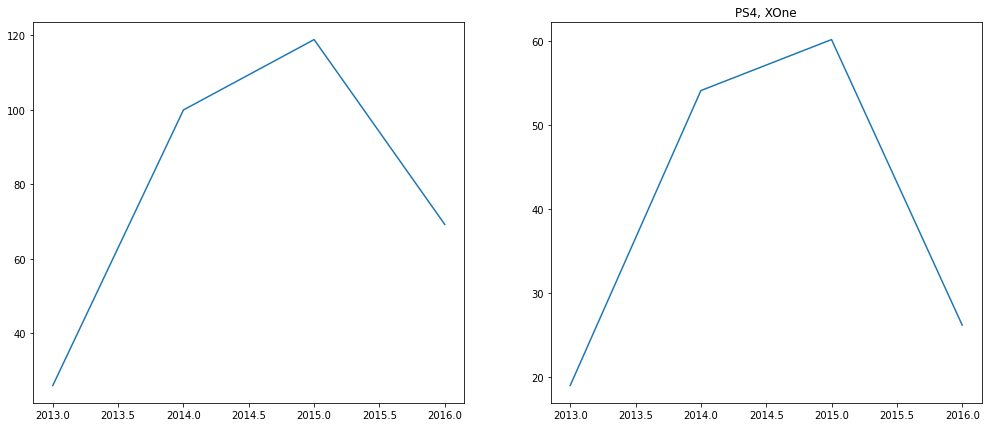

In [45]:
sales_ps4 = data.query('year_of_release != 0  and platform in ["PS4"]').pivot_table(
        index='year_of_release', values='sales', aggfunc='sum')
sales_x1 = data.query('year_of_release != 0 and platform in ["XOne"]').pivot_table(
        index='year_of_release', values='sales', aggfunc='sum')

fig, ax = plt.subplots(1,2, figsize=(17, 7))
ax[0].plot(sales_ps4.index, sales_ps4['sales'])
ax[1].plot(sales_x1.index, sales_x1['sales'])
plt.title('PS4, XOne')
plt.show()

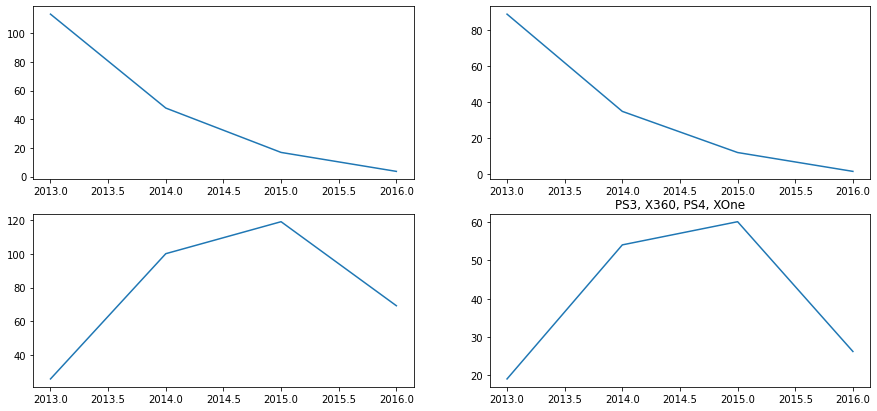

In [46]:
sales_ps3_y13 = sales_ps3.query('year_of_release >= 2013')
sales_x360_y13 = sales_x360.query('year_of_release >= 2013')

fig, ax = plt.subplots(2,2, figsize=(15, 7))

ax[0,0].plot(sales_ps3_y13.index, sales_ps3_y13['sales'])
ax[0,1].plot(sales_x360_y13.index, sales_x360_y13['sales'])
plt.title('PS3, X360, PS4, XOne')
ax[1,0].plot(sales_ps4.index, sales_ps4['sales'])
ax[1,1].plot(sales_x1.index, sales_x1['sales'])

plt.show()

Text(0.5, 1.0, 'Продажи игр на PS4')

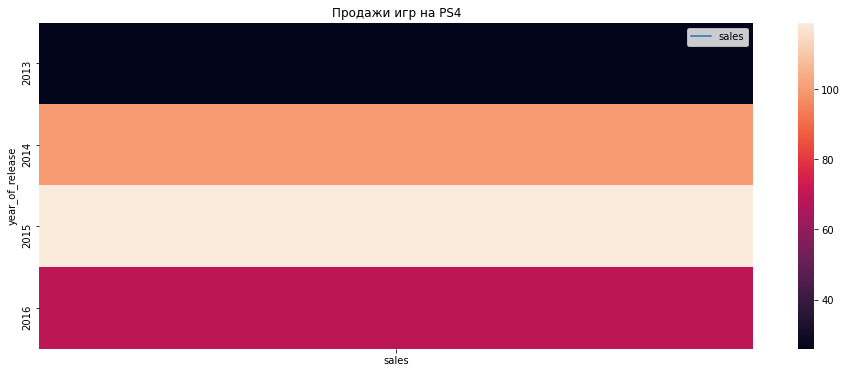

In [47]:
sales_ps4.plot(fontsize=10, figsize=(16, 6))
sns.heatmap(sales_ps4)
plt.title('Продажи игр на PS4')

На этот раз продажи игр на консолях прошлого покаления продалжались и после выхода нового покаления приставок. Продажи игр на PS4 значительно превзошли XOne, однако оказались ниже продаж игр прошлого покаления приставок на пике.

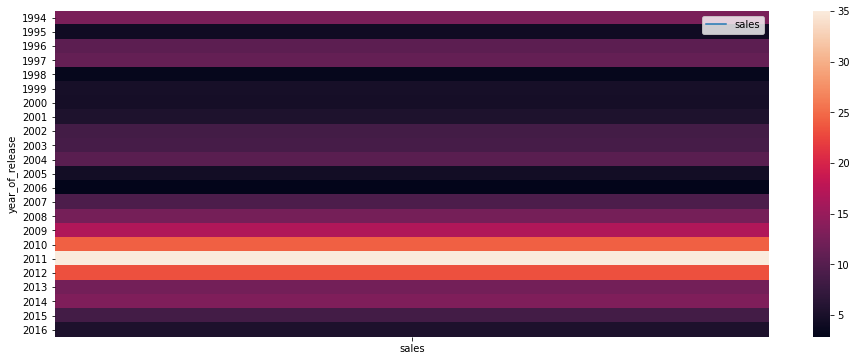

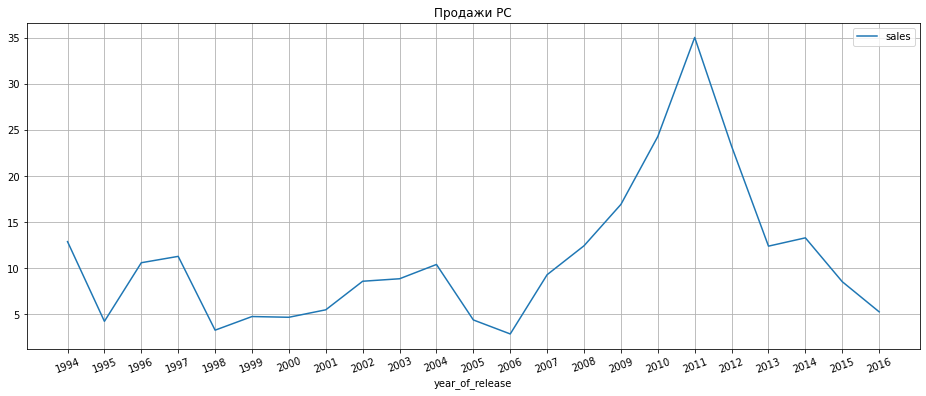

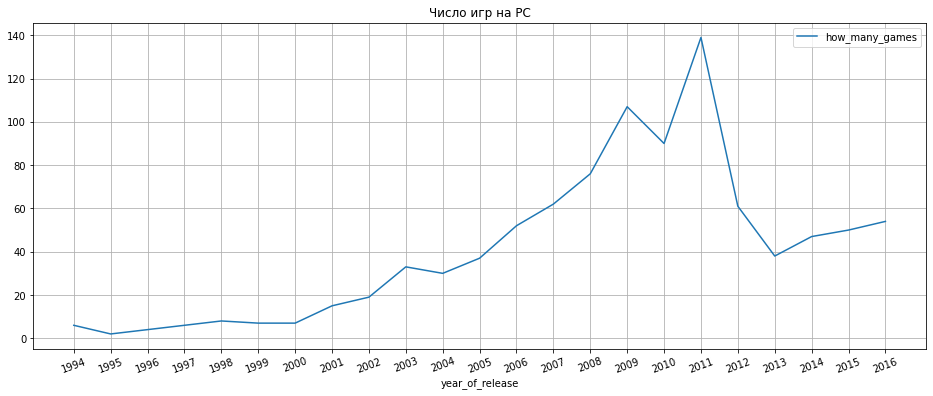

In [48]:
pc = data.query('year_of_release >= 1994  and platform in ["PC"]').pivot_table(
        index='year_of_release', values='sales', aggfunc='sum')
pc_count = data.query('year_of_release >= 1994  and platform in ["PC"]').pivot_table(
        index='year_of_release', values='name', aggfunc='count')
pc_count.columns = ['how_many_games']

pc.plot(fontsize=10, figsize=(16, 6))
sns.heatmap(pc)
pc.plot(y='sales', xticks = list(pc.index), fontsize=10, figsize=(16, 6), grid = True)
plt.xticks(rotation = 20)
plt.title('Продажи игр на PC')
plt.title('Продажи PC')
pc_count.plot(y='how_many_games', xticks = list(pc.index), fontsize=10, figsize=(16, 6), grid = True)
plt.xticks(rotation = 20)
plt.title('Число игр на PC')

plt.show()

Как мы видим из графика с 1994 по 2011 годы наблюдается резкий рост числа выпускаемых игр и их продаж, резкий спад намечается в 2011 а не с 2009 как при просмотре сведений по всем платформам в совокупности. 

Вывод: цикл жизни приставок определяется появлением следующего покаления и составляет от 6 до 10 лет. 

### Подробнее расмотрим распределение продаж игр по платформам. 

За актуальный возьмем период с 2013 по 2016 год, опираясь на годы выхода игр на последнее (из представленных в DataFrame) поколение консолей. 

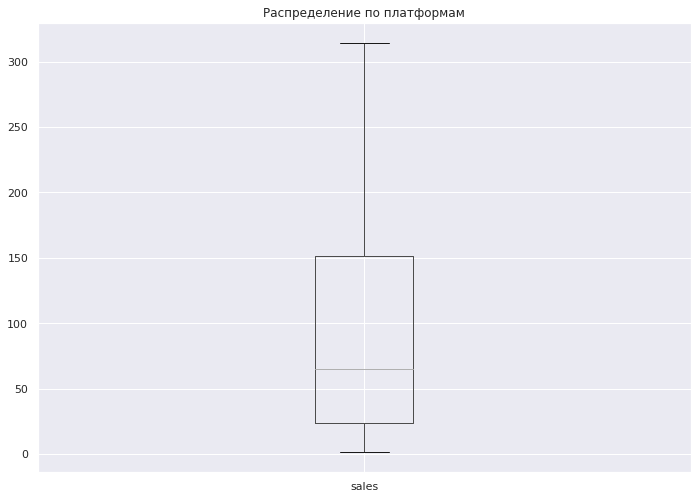

In [91]:
sales_platform = data.query('year_of_release > 2012').pivot_table(
        index='platform', values='sales', aggfunc='sum')
sales_platform.boxplot()
plt.title('Распределение по платформам')
plt.show()

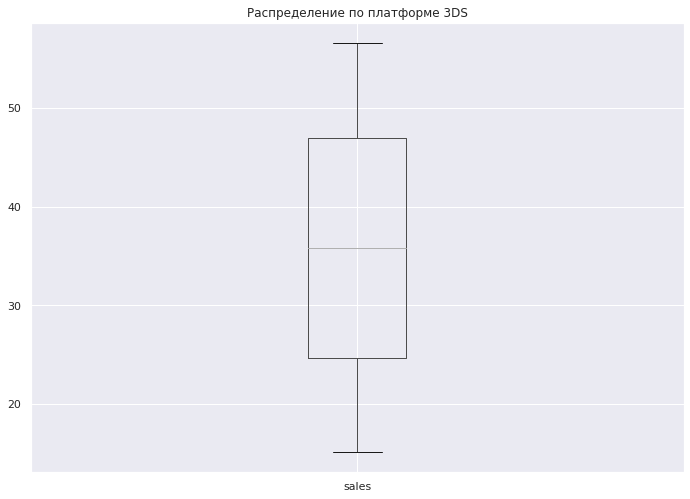

In [92]:
sales_3DS = data.query('year_of_release > 2012 and platform in ["3DS"]').pivot_table(
        index='year_of_release', values='sales', aggfunc='sum')
sales_PS3 = data.query('year_of_release > 2012 and platform in ["PS3"]').pivot_table(
        index='year_of_release', values='sales', aggfunc='sum')
sales_PS4 = data.query('year_of_release > 2012 and platform in ["PS4"]').pivot_table(
        index='year_of_release', values='sales', aggfunc='sum')
sales_X360 = data.query('year_of_release > 2012 and platform in ["X360"]').pivot_table(
        index='year_of_release', values='sales', aggfunc='sum')
sales_XOne = data.query('year_of_release > 2012 and platform in ["XOne"]').pivot_table(
        index='year_of_release', values='sales', aggfunc='sum')
sales_PC = data.query('year_of_release > 2012 and platform in ["PC"]').pivot_table(
        index='year_of_release', values='sales', aggfunc='sum')
sales_PSV = data.query('year_of_release > 2012 and platform in ["PSV"]').pivot_table(
        index='year_of_release', values='sales', aggfunc='sum')
sales_WiiU = data.query('year_of_release > 2012 and platform in ["WiiU"]').pivot_table(
        index='year_of_release', values='sales', aggfunc='sum')

sales_3DS.boxplot()
plt.title('Распределение по платформе 3DS')
plt.show()

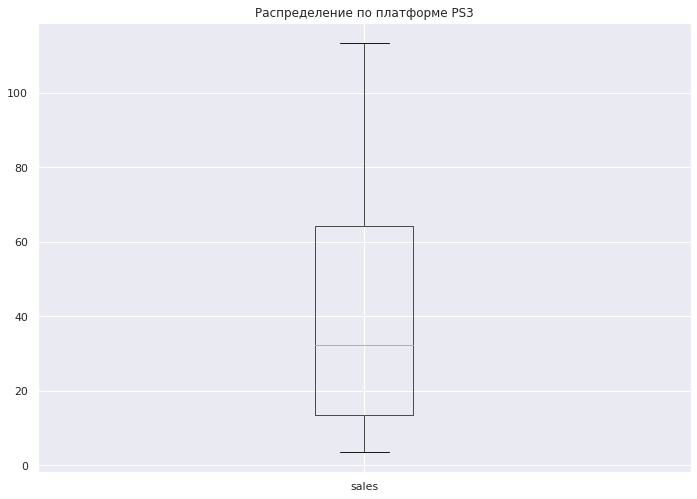

In [94]:
sales_PS3.boxplot()
plt.title('Распределение по платформе PS3')
plt.show()

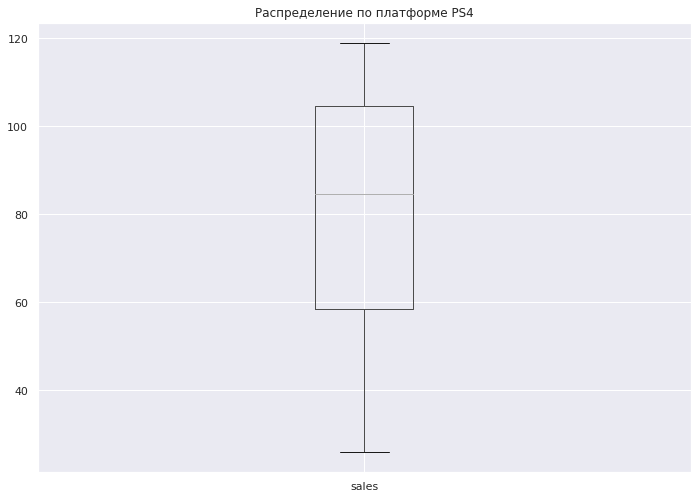

In [95]:
sales_PS4.boxplot()
plt.title('Распределение по платформе PS4')
plt.show()

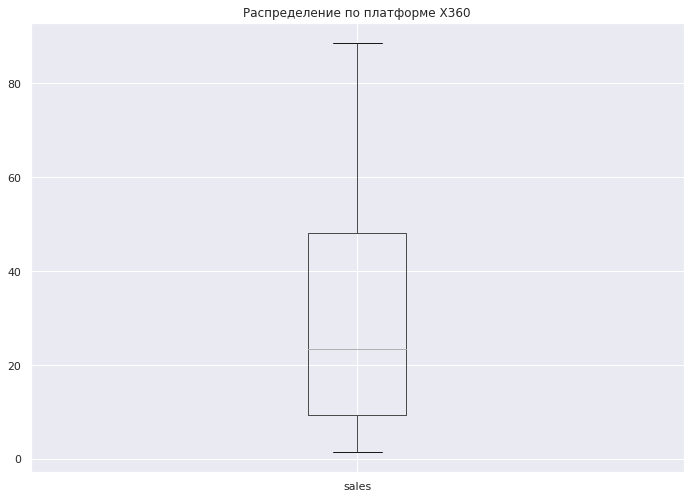

In [96]:
sales_X360.boxplot()
plt.title('Распределение по платформе X360')
plt.show()

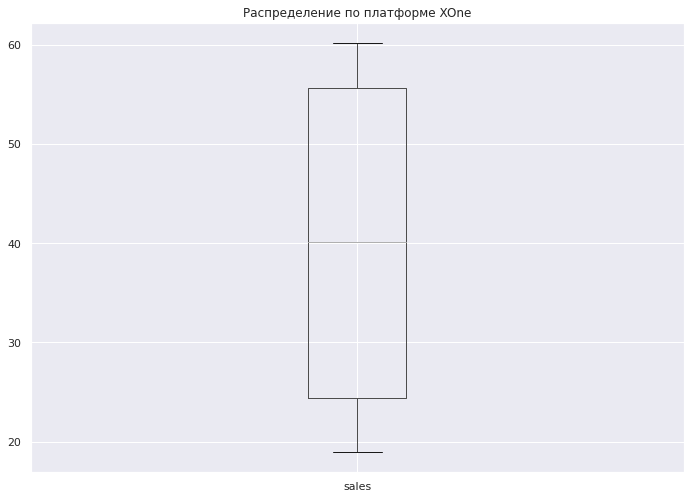

In [97]:
sales_XOne.boxplot()
plt.title('Распределение по платформе XOne')
plt.show()

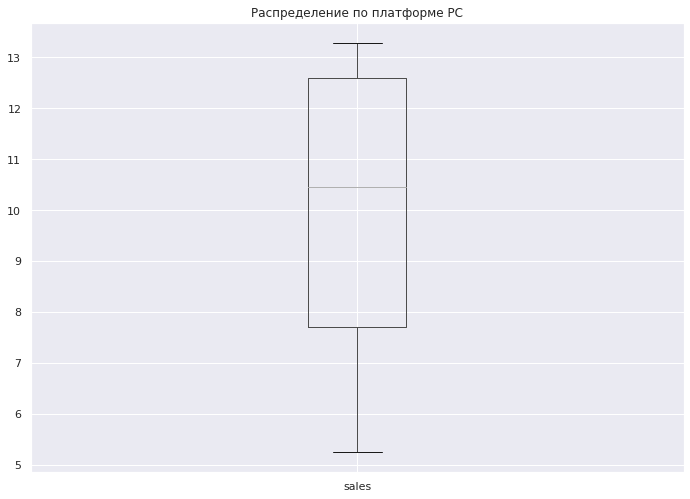

In [98]:
sales_PC.boxplot()
plt.title('Распределение по платформе PC')
plt.show()

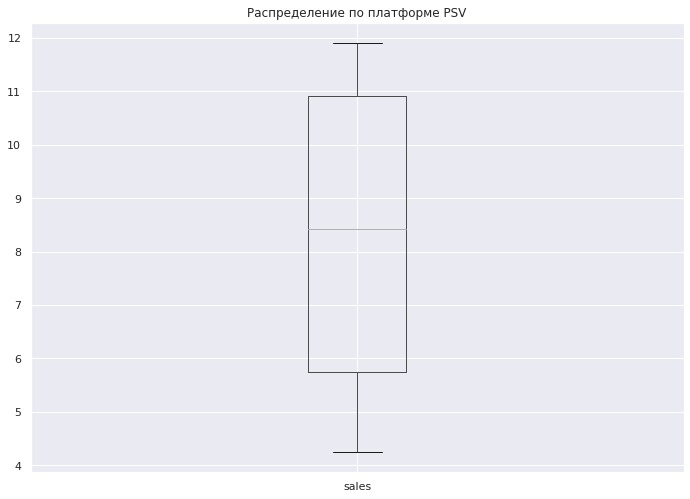

In [99]:
sales_PSV.boxplot()
plt.title('Распределение по платформе PSV')
plt.show()

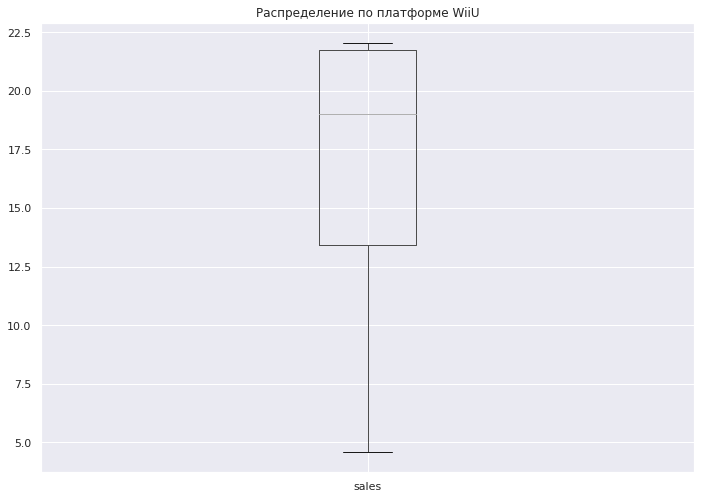

In [100]:
.boxplot()
plt.title('Распределение по платформе WiiU')
plt.show()

Text(0.5, 1.0, 'WiiU')

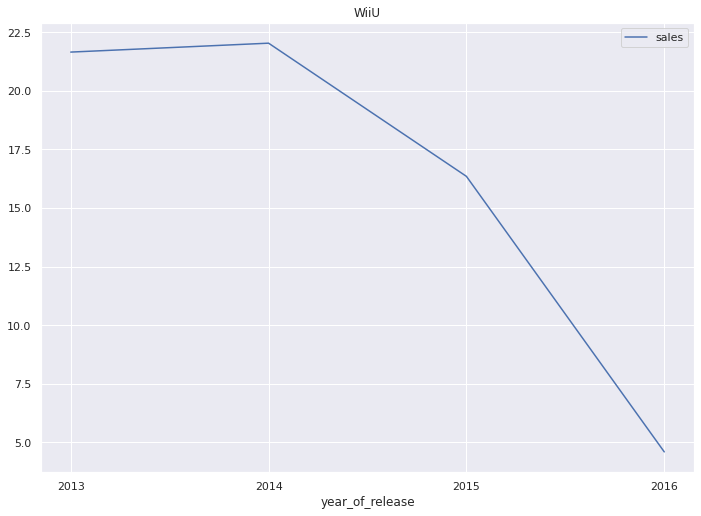

In [103]:
sales_WiiU.plot(y="sales", xticks = list(sales_WiiU.index), grid = True)
plt.title('WiiU')

Text(0.5, 1.0, 'Продажи по платформам')

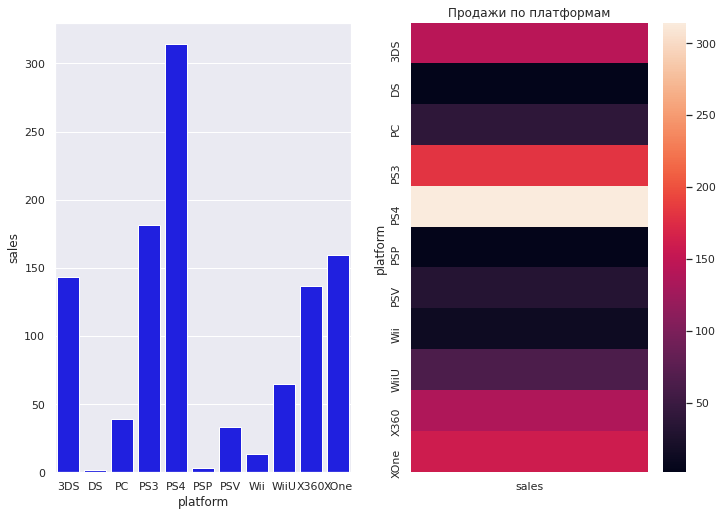

In [50]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(1, 2, 1)
sns.barplot(y = 'sales', x=sales_platform.index,  data=sales_platform, color='blue')
plt.subplot(1, 2, 2)
sns.heatmap(sales_platform)
plt.title('Продажи по платформам')

In [51]:
sales_platform.describe()

,sales
count,11.000000
mean,99.153636
std,97.516096
min,1.540000
25%,23.325000
50%,64.630000
75%,151.285000
max,314.140000


Как мы видим из графика распределения, медианное значение находится в районе 65 млн. проданных копий, что соответствует продажам WiiU, усы распределения смещены в сторону увеличения от медианного (что логично, так как продажи не могут упасть ниже нуля), максимальными являются продажи игр на PS4. Для старых платформ (PS3 и X360), продажи которых идут на спад характерно смещение медианного значения к минимальному значению, в более новых платформах медиана распределяется почти посередине, исключение составляет WiiU, где видно смещение медианного значения к максимальному значению.

### Изучим влияние пользовательских и экспертных оценок на продажи. 

Text(0.5, 1.0, 'Кореляция с общими продажами')

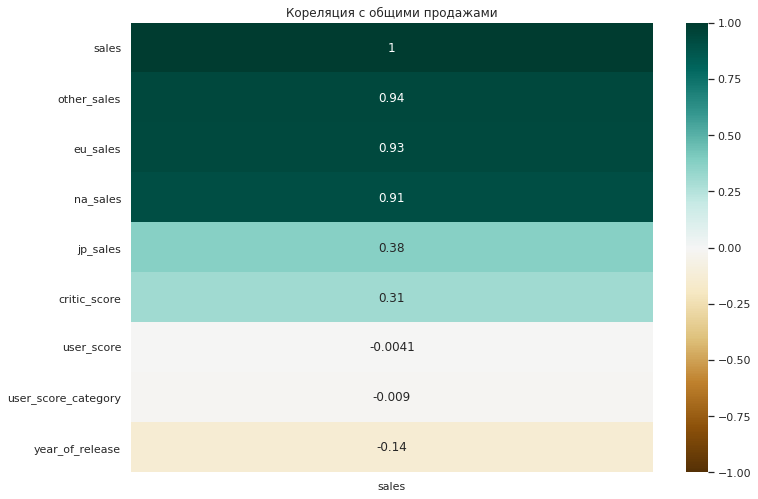

In [52]:
sns.heatmap(data.query('year_of_release > 2012 and critic_score != 0.0 and user_score != 0.0').corr()[['sales']].sort_values(
    by='sales', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Кореляция с общими продажами')

Кто бы мог подумать продажи в регионах сильно коррелируют с общими продажами, за исключением Японии, их вкусы специфичны, а рынок самобытен. Что касается отзывов судя по heatmap пользователевские отзывы почти не влияют на продажи, а вот с отзывами критиков корреляция присутствует. Расмотрим влияние отзывов подробнее на примере "PS4".

Text(0.5, 1.0, 'Кореляция с общими продажами на PS4')

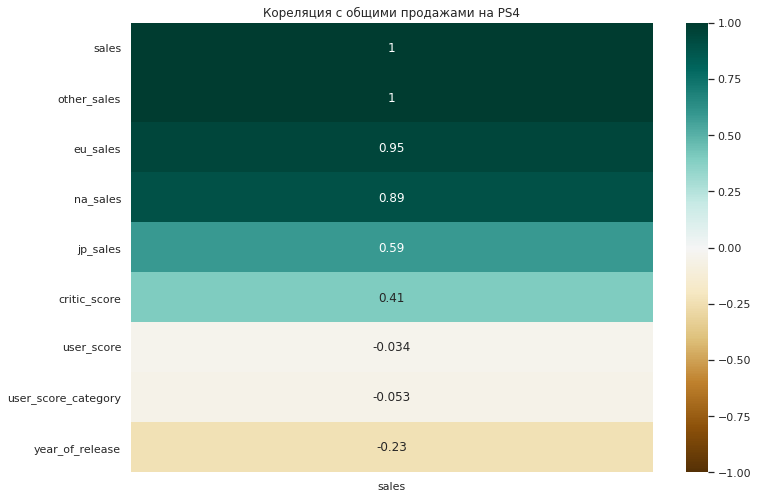

In [53]:
sns.heatmap(data.query('year_of_release > 2012 and critic_score != 0.0 and user_score != 0.0 and platform in ["PS4"]').corr()[['sales']].sort_values(
    by='sales', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Кореляция с общими продажами на PS4')

In [54]:
critic_score_sales_ps4 = data.query(
    'year_of_release > 2012 and platform in ["PS4"] and critic_score_category != 0').pivot_table(
    index='critic_score_category', values ='sales', aggfunc='mean')
critic_score_sales_ps4.columns = ['sales']
critic_score_sales_ps4

,sales
critic_score_category,
0,0.497500
2,0.120000
3,0.060000
4,0.126667
5,0.124545
6,0.220455
7,0.391509
8,0.821414
9,2.187742


Text(0.5, 1.0, 'Зависимость продаж PS4 от обзоров критиков')

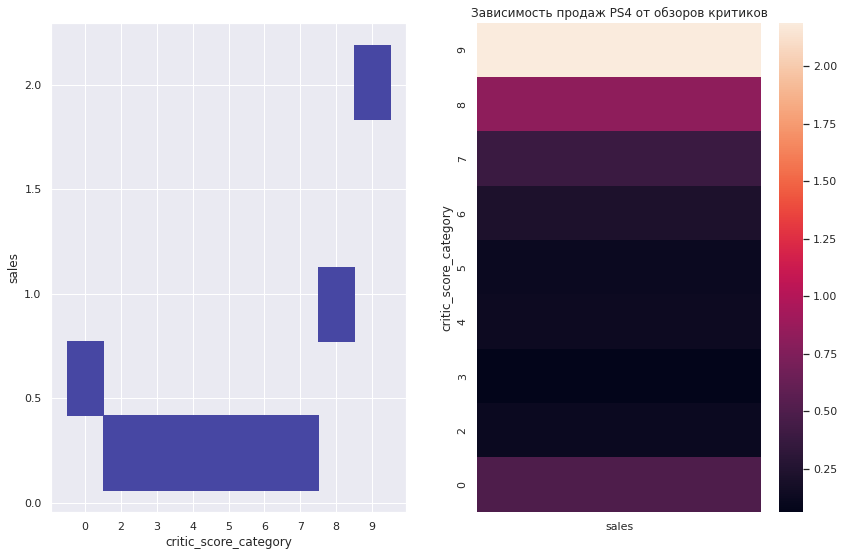

In [55]:
sns.set(rc={'figure.figsize':(14,9)})
plt.subplot(1, 2, 1)
sns.histplot(x='critic_score_category', y ='sales', data=critic_score_sales_ps4, color='blue')
plt.subplot(1, 2, 2)
sns.heatmap(critic_score_sales_ps4.sort_values('critic_score_category', ascending = False))
plt.title('Зависимость продаж PS4 от обзоров критиков')

In [56]:
user_score_sales_ps4 = data.query('year_of_release > 2012 and platform in ["PS4"] and user_score != 0.0').pivot_table(
    index='user_score_category', values='sales', aggfunc='mean')
user_score_sales_ps4.columns = ['sales']
user_score_sales_ps4

,sales
user_score_category,
2,0.100000
3,0.892857
4,1.408333
5,1.814167
6,1.121552
7,0.760161
8,0.844457
9,1.070000


Text(0.5, 1.0, 'Зависимость продаж PS4 от обзоров пользователей')

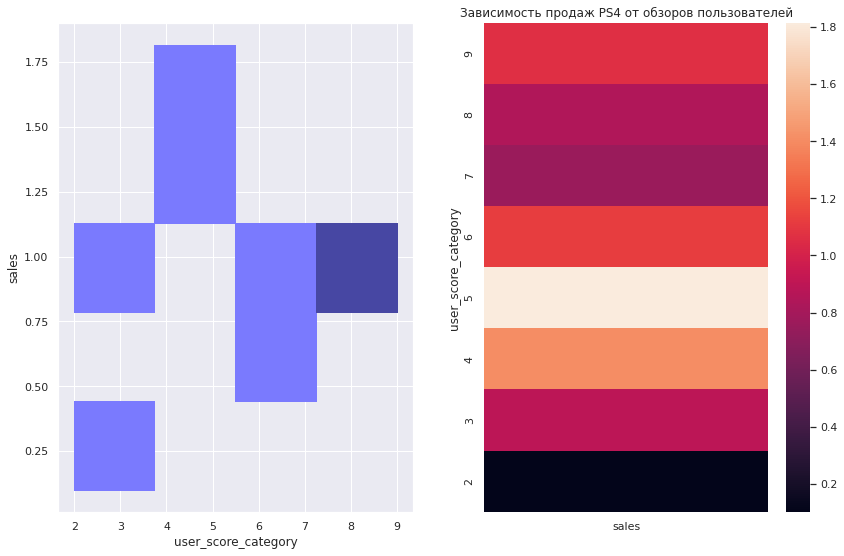

In [57]:
sns.set(rc={'figure.figsize':(14,9)})
plt.subplot(1, 2, 1)
sns.histplot(x='user_score_category', y ='sales', data=user_score_sales_ps4, color='blue')
plt.subplot(1, 2, 2)
sns.heatmap(user_score_sales_ps4.sort_values('user_score_category', ascending = False))
plt.title('Зависимость продаж PS4 от обзоров пользователей')

In [58]:
print("общее число игр:", data.query('year_of_release > 2012 and platform in ["PS4"]').name.count())
data.query('year_of_release > 2012 and platform in ["PS4"] and user_score != 0.0').pivot_table(
    index='user_score', values='name', aggfunc='count').query ('name >=10')

общее число игр: 392


,name
user_score,
7.1,11
7.6,11
7.7,11
7.8,13
7.9,10
8.0,10
8.1,14


In [ ]:
data.query(
    'year_of_release > 2012 and platform in ["PS4"] and user_score_category == 5').sort_values('sales', ascending = False)

На примере PS4 можно увидеть, что рейтинг отзывы критиков корелируют с продажами, это наиболее характерно для рейтинга выше 50. Оценить влияния пользовательских оценок на продажи не удалось, так как треть всех игр имеют рейтинг 7.0, а игры с рейтингом около 4.9 - 5.2 являются представителями известных фрашиз (FIFA, Assasin's Creed, Battlefield, Mafia, Madden NFL) и более того имеют хорошие оценки критиков, поэтому продаются лучше чем игры с более высокими пользовательскими оценками. 

Посмотрим как обстоят дела на других консолях, для этого расмотрим рынок PC и портативных приставок.

Text(0.5, 1.0, 'Кореляция с общими продажами на PС')

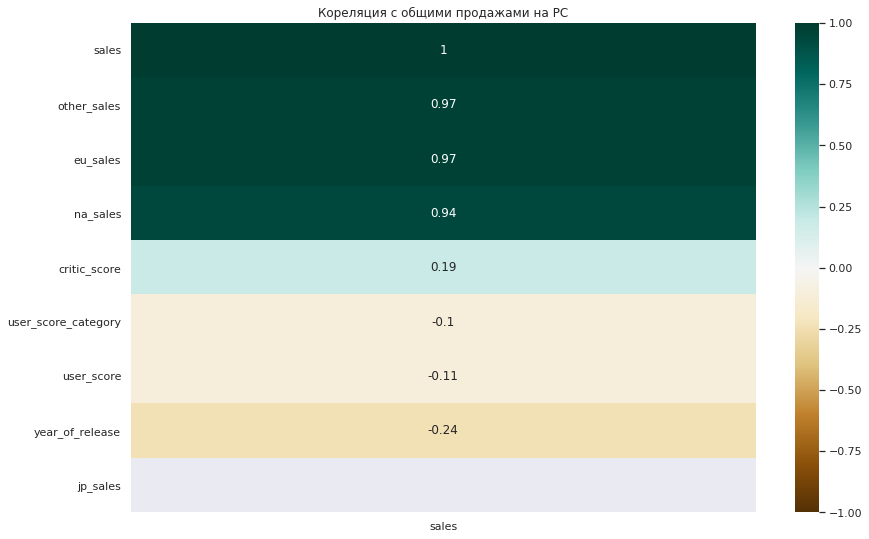

In [60]:
sns.heatmap(data.query('year_of_release > 2012 and critic_score != 0.0 and user_score != 0.0 and platform in ["PC"]').corr()[['sales']].sort_values(
    by='sales', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Кореляция с общими продажами на PС')

In [61]:
critic_score_sales_pс = data.query(
    'year_of_release > 2012 and platform in ["PC"] and critic_score_category != 0').pivot_table(
    index='critic_score_category', values ='sales', aggfunc='mean')
critic_score_sales_pс.columns = ['sales']
critic_score_sales_pс

,sales
critic_score_category,
0,0.114750
4,0.080000
5,0.076667
6,0.038333
7,0.260000
8,0.167586
9,0.326415


Text(0.5, 1.0, 'Зависимость продаж PС от обзоров критиков')

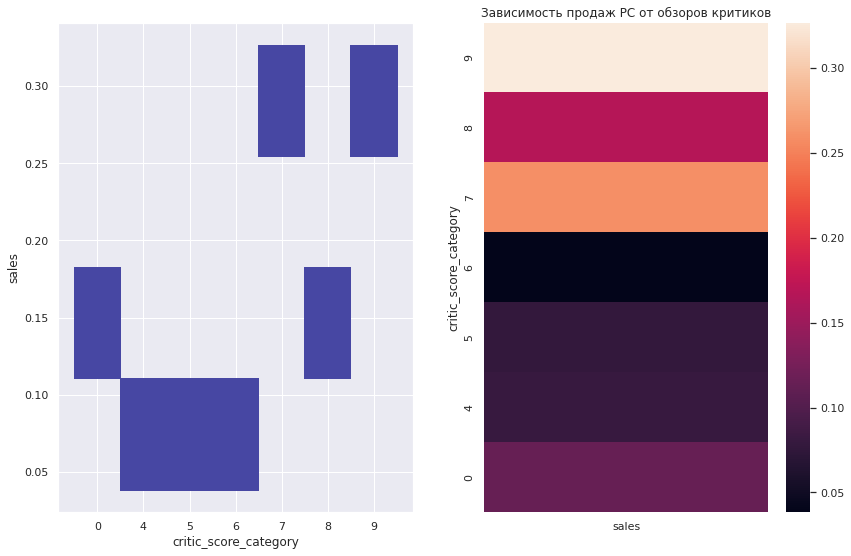

In [62]:
sns.set(rc={'figure.figsize':(14,9)})
plt.subplot(1, 2, 1)
sns.histplot(x='critic_score_category', y ='sales', data=critic_score_sales_pс, color='blue')
plt.subplot(1, 2, 2)
sns.heatmap(critic_score_sales_pс.sort_values('critic_score_category', ascending = False))
plt.title('Зависимость продаж PС от обзоров критиков')

In [ ]:
data.query(
    'year_of_release > 2012 and platform in ["PC"]').sort_values('critic_score_category').head(10).tail(6)

In [64]:
user_score_sales_pc = data.query('year_of_release > 2012 and platform in ["PC"] and user_score != 0.0').pivot_table(
    index='user_score_category', values='sales', aggfunc='mean')
user_score_sales_pc.columns = ['sales']
user_score_sales_pc

,sales
user_score_category,
1,0.015000
2,0.480000
3,0.187143
4,0.320556
5,0.226667
6,0.282581
7,0.130571
8,0.225789
9,0.175000


Text(0.5, 1.0, 'Зависимость продаж PC от обзоров пользователей')

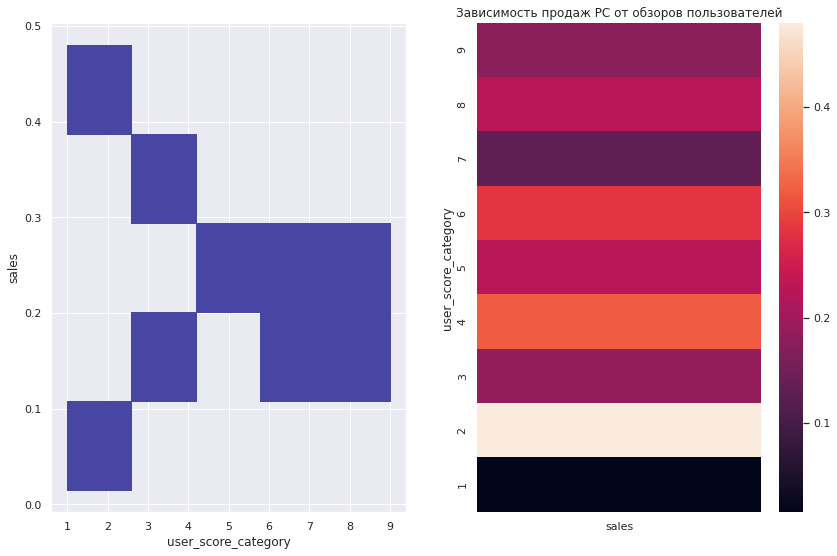

In [65]:
sns.set(rc={'figure.figsize':(14,9)})
plt.subplot(1, 2, 1)
sns.histplot(x='user_score_category', y ='sales', data=user_score_sales_pc, color='blue')
plt.subplot(1, 2, 2)
sns.heatmap(user_score_sales_pc.sort_values('user_score_category', ascending = False))
plt.title('Зависимость продаж PC от обзоров пользователей')

In [ ]:
data.query(
    'year_of_release > 2012 and platform in ["PC"] and user_score_category == 2').sort_values('sales', ascending = False)

В целом ситуация похожа аналогична PS4, очевидно перезапуск серии SimCity игроки не оценили, но купили. 

Похоже японцы не играют в игры на PC, возможно им больше нравятся потративные устройства?

Text(0.5, 1.0, 'Кореляция с общими продажами на 3DS')

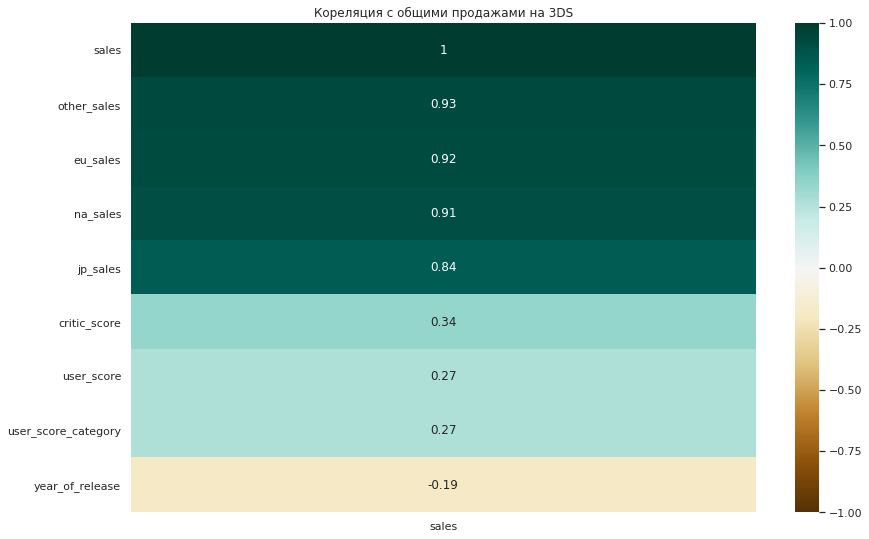

In [67]:
sns.heatmap(data.query('year_of_release > 2012 and critic_score != 0.0 and user_score != 0.0 and platform in ["3DS"]').corr()[['sales']].sort_values(
    by='sales', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Кореляция с общими продажами на 3DS')

In [68]:
critic_score_sales_3ds = data.query(
    'year_of_release > 2012 and platform in ["3DS"] and critic_score_category != 0').pivot_table(
    index='critic_score_category', values ='sales', aggfunc='mean')
critic_score_sales_3ds.columns = ['sales']
critic_score_sales_3ds

,sales
critic_score_category,
0,0.443664
3,0.020000
5,0.161250
6,0.422500
7,0.459091
8,0.415000
9,1.290000


Text(0.5, 1.0, 'Зависимость продаж 3DS от обзоров критиков')

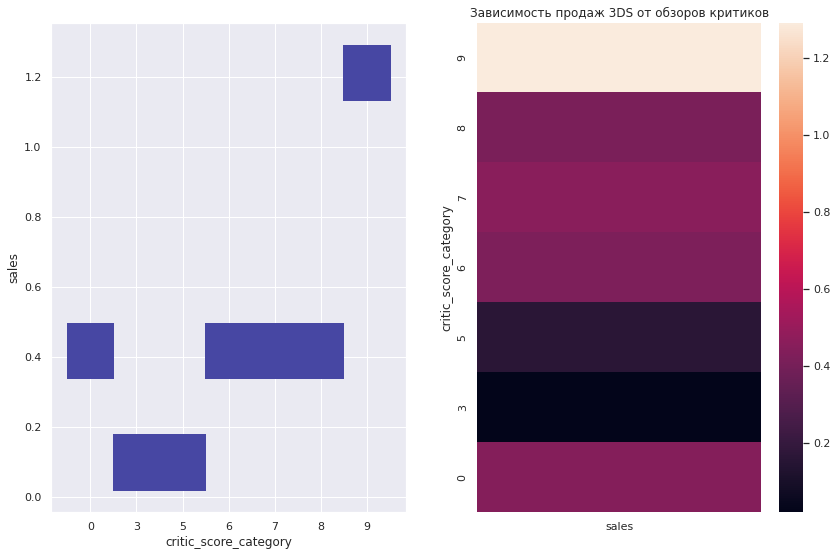

In [69]:
sns.set(rc={'figure.figsize':(14,9)})
plt.subplot(1, 2, 1)
sns.histplot(x='critic_score_category', y ='sales', data=critic_score_sales_3ds, color='blue')
plt.subplot(1, 2, 2)
sns.heatmap(critic_score_sales_3ds.sort_values('critic_score_category', ascending = False))
plt.title('Зависимость продаж 3DS от обзоров критиков')

In [70]:
user_score_sales_3ds = data.query('year_of_release > 2012 and platform in ["3DS"] and user_score != 0.0').pivot_table(
    index='user_score_category', values='sales', aggfunc='mean')
user_score_sales_3ds.columns = ['sales']
user_score_sales_3ds

,sales
user_score_category,
2,0.240000
3,0.305000
4,0.270000
5,0.398000
6,0.401429
7,0.428125
8,0.457241
9,1.514444


Text(0.5, 1.0, 'Зависимость продаж 3DS от обзоров пользователей')

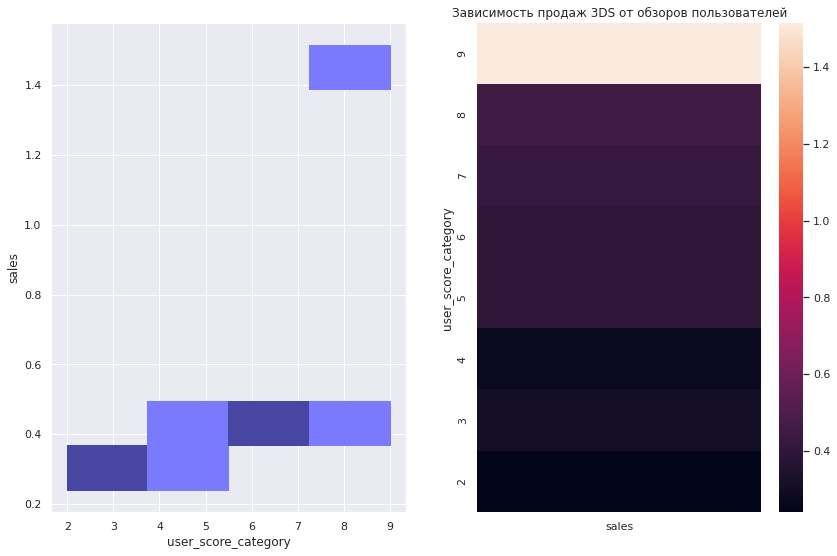

In [71]:
sns.set(rc={'figure.figsize':(14,9)})
plt.subplot(1, 2, 1)
sns.histplot(x='user_score_category', y ='sales', data=user_score_sales_3ds, color='blue')
plt.subplot(1, 2, 2)
sns.heatmap(user_score_sales_3ds.sort_values('user_score_category', ascending = False))
plt.title('Зависимость продаж 3DS от обзоров пользователей')

Японцы играют в игры на 3DS. Отзывы слабо коррелируют с продажами игр на 3DS.

```
Вывод
```
продажи игр слабо коррелируют с пользовательскими оценками. При принятии решения о покупке игры пользователь больше ориентируется на оценку критиков.

### Расмотрим распределение продаж игр по жанрам. 

Text(0.5, 1.0, 'Продажи по жанрам')

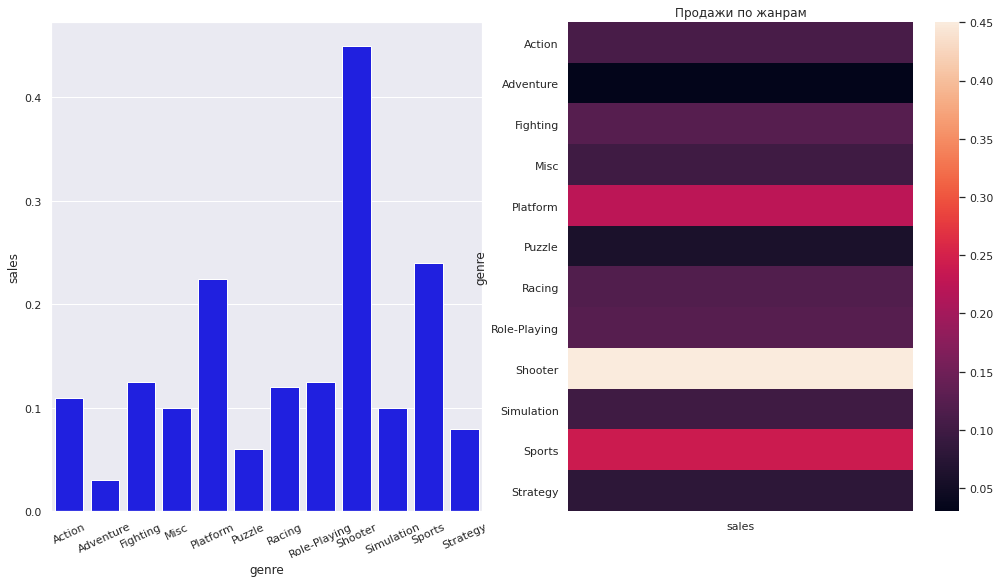

In [104]:
sales_genre = data.query('year_of_release > 2012').pivot_table(
        index='genre', values='sales', aggfunc='median')

sns.set(rc={'figure.figsize':(17,9)})
plt.subplot(1, 2, 1)
sns.barplot(y = 'sales', x=sales_genre.index,  data=sales_genre, color='blue')
plt.xticks(rotation = 25)
plt.subplot(1, 2, 2)
sns.heatmap(sales_genre)
plt.title('Медианные продажи по жанрам')

Text(0.5, 1.0, 'Средние продажи по жанрам')

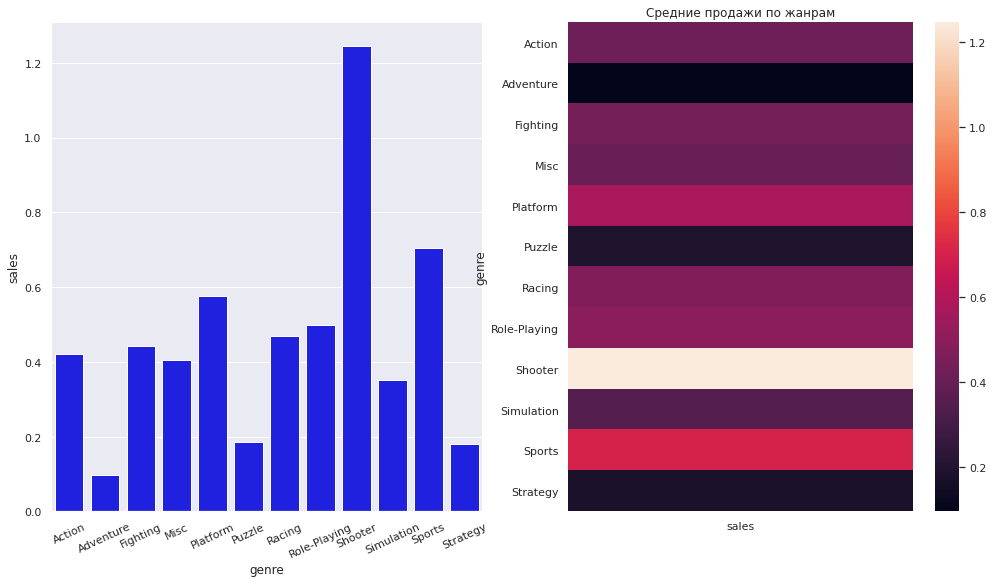

In [105]:
sales_genre_mean = data.query('year_of_release > 2012').pivot_table(
        index='genre', values='sales', aggfunc='mean')

sns.set(rc={'figure.figsize':(17,9)})
plt.subplot(1, 2, 1)
sns.barplot(y = 'sales', x=sales_genre_mean.index,  data=sales_genre_mean, color='blue')
plt.xticks(rotation = 25)
plt.subplot(1, 2, 2)
sns.heatmap(sales_genre_mean)
plt.title('Средние продажи по жанрам')

Самым прибыльным является жанр Шутер, так же выделяются спортивные симуляторы и платформеры. Пазлы, адвенчуры и стратегии продаются хуже всего.

```
Вывод
```
Срок жизни большинства консолей составляет 6-8 лет, исключение PC; с 2009 года продолжается спад индустрии игр; продажи игр слабо коррелируют с пользовательскими оценками, при принятии решения о покупке игры пользователь больше ориентируется на оценку критиков; самым прибыльным является жанр Action.

## Составим портрет пользователя каждого региона.

Ранее мы заметели специфику японского рынка (отсутствия продаж на PC и высокие продажи на 3DS), стоит расмотреть каждый рынок отдельно. 

### Определим самые популярные платформы для пользователя каждого региона (NA, EU, JP).

Text(0.5, 1.0, '5 самых популярных платформ в Северной Америке')

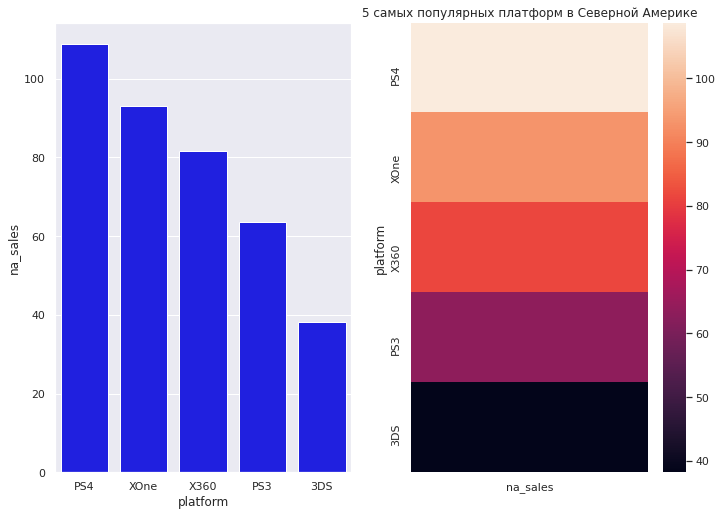

In [73]:
na_sales_platform = data.query('year_of_release > 2012').pivot_table(
        index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending = False).head(5)

sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(1, 2, 1)
sns.barplot(y = 'na_sales', x=na_sales_platform.index,  data=na_sales_platform, color='blue')
plt.subplot(1, 2, 2)
sns.heatmap(na_sales_platform)
plt.title('5 самых популярных платформ в Северной Америке')

Text(0.5, 1.0, '5 самых популярных платформ в Европе')

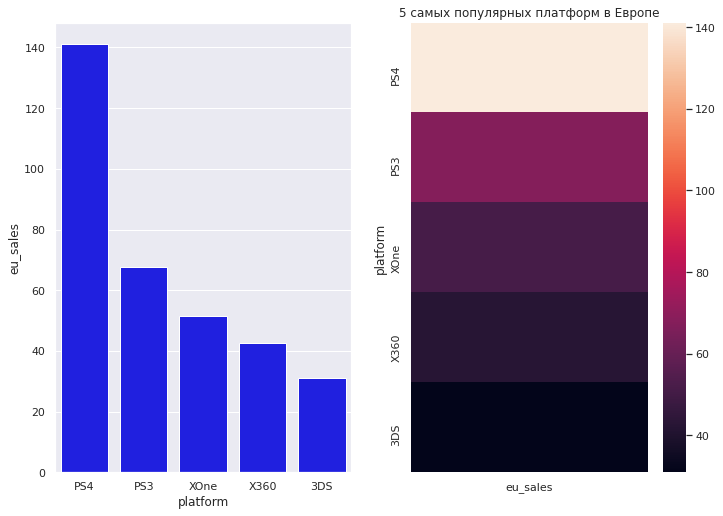

In [74]:
eu_sales_platform = data.query('year_of_release > 2012').pivot_table(
        index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending = False).head(5)

sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(1, 2, 1)
sns.barplot(y = 'eu_sales', x=eu_sales_platform.index,  data=eu_sales_platform, color='blue')
plt.subplot(1, 2, 2)
sns.heatmap(eu_sales_platform)
plt.title('5 самых популярных платформ в Европе')

Text(0.5, 1.0, '5 самых популярных платформ в Японии')

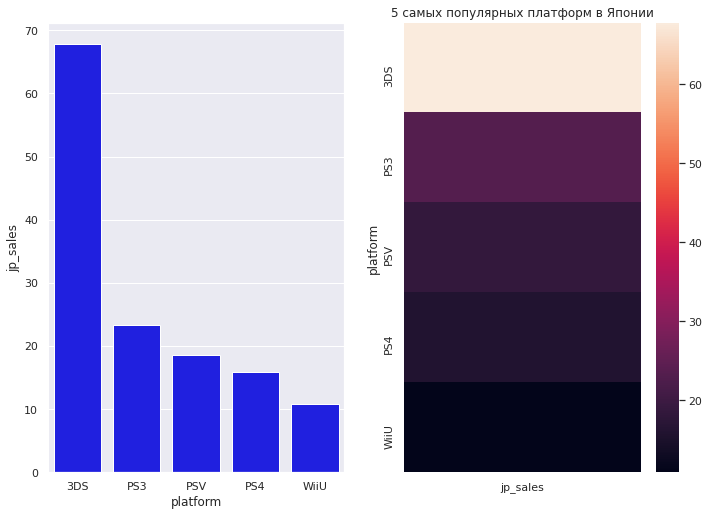

In [75]:
jp_sales_platform = data.query('year_of_release > 2012').pivot_table(
        index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending = False).head(5)

sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(1, 2, 1)
sns.barplot(y = 'jp_sales', x=jp_sales_platform.index,  data=jp_sales_platform, color='blue')
plt.subplot(1, 2, 2)
sns.heatmap(jp_sales_platform)
plt.title('5 самых популярных платформ в Японии')

Как видно из графиков в топ 5 популярных платформ и в Европе и в Северной Америке входят одни и те  же платформы, лидирует при этом PS4, однако ХBOX пользуется в Америке большей популярностью. В Японии ХBOX не входят в топ-5 платформ, 1 и 3 место по популярности занимают портативные 3DS и PSV, кроме того PS4 уступает в популярности PS3, в топ-5 входит WiiU.

Text(0.5, 1.0, '5 самых популярных жанров в Северной Америке')

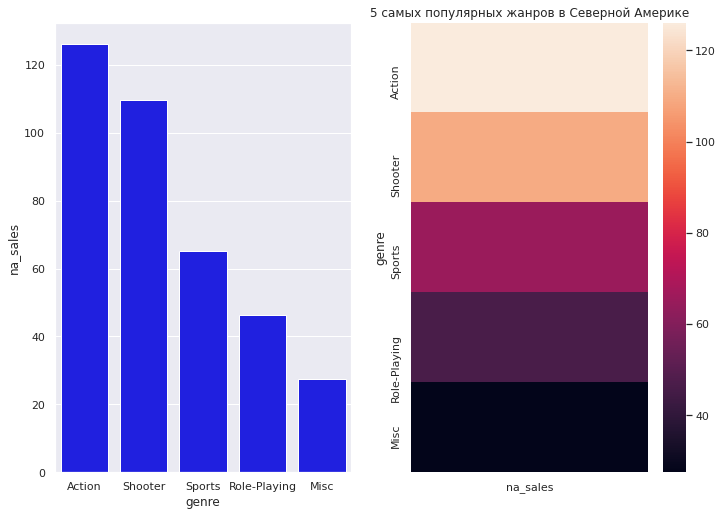

In [76]:
na_sales_genre = data.query('year_of_release > 2012').pivot_table(
        index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending = False).head(5)

sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(1, 2, 1)
sns.barplot(y = 'na_sales', x=na_sales_genre.index,  data=na_sales_genre, color='blue')
plt.subplot(1, 2, 2)
sns.heatmap(na_sales_genre)
plt.title('5 самых популярных жанров в Северной Америке')

Text(0.5, 1.0, '5 самых популярных жанров в Европе')

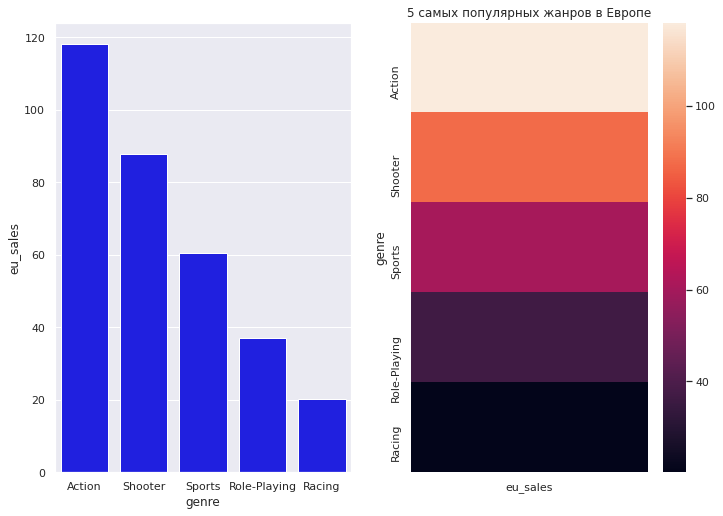

In [77]:
eu_sales_genre = data.query('year_of_release > 2012').pivot_table(
        index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending = False).head(5)

sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(1, 2, 1)
sns.barplot(y = 'eu_sales', x=eu_sales_genre.index,  data=eu_sales_genre, color='blue')
plt.subplot(1, 2, 2)
sns.heatmap(eu_sales_genre)
plt.title('5 самых популярных жанров в Европе')

Text(0.5, 1.0, '5 самых популярных жанров в Японии')

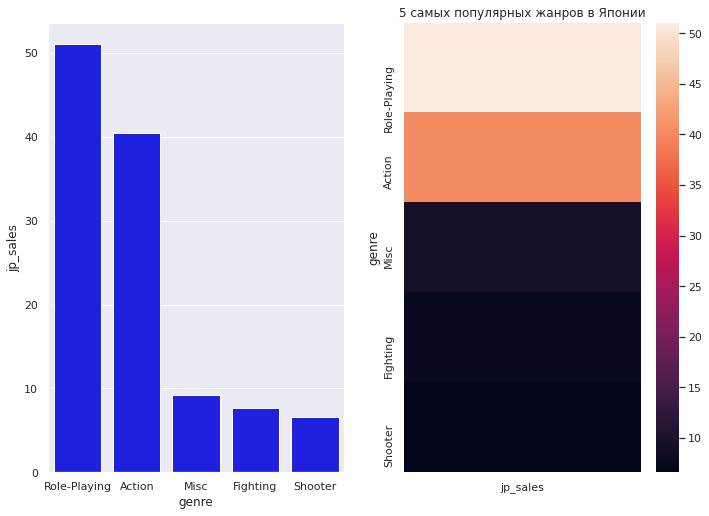

In [78]:
jp_sales_genre = data.query('year_of_release > 2012').pivot_table(
        index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending = False).head(5)

sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(1, 2, 1)
sns.barplot(y = 'jp_sales', x=jp_sales_genre.index,  data=jp_sales_genre, color='blue')
plt.subplot(1, 2, 2)
sns.heatmap(jp_sales_genre)
plt.title('5 самых популярных жанров в Японии')

Как видно из графиков в топ 5 популярных жанов и в Европе и в Северной Америке входят одни и те  же платформы, заисключением пятой позиции - в Америке играют в Mics а в Европе в гонки, лидирует при этом Action. В Японии ролевые игры популярнее Action, кроме того в то-5 входят fighting и стрелялки.

Text(0.5, 1.0, 'Зависимость популярности игр от возрастного рейтинга в Северной Америке')

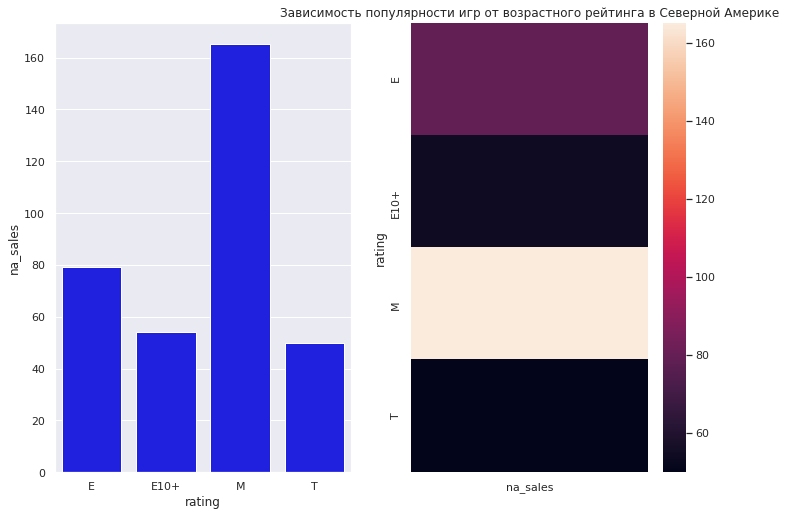

In [79]:
na_sales_rating = data.query('year_of_release > 2012 and rating != "unknow_rating"').pivot_table(
        index='rating', values='na_sales', aggfunc='sum')

sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(1, 2, 1)
sns.barplot(y = 'na_sales', x=na_sales_rating.index,  data=na_sales_rating, color='blue')
plt.subplot(1, 2, 2)
sns.heatmap(na_sales_rating)
plt.title('Зависимость популярности игр от возрастного рейтинга в Северной Америке')

Text(0.5, 1.0, 'Зависимость популярности игр от возрастного рейтинга в Европе')

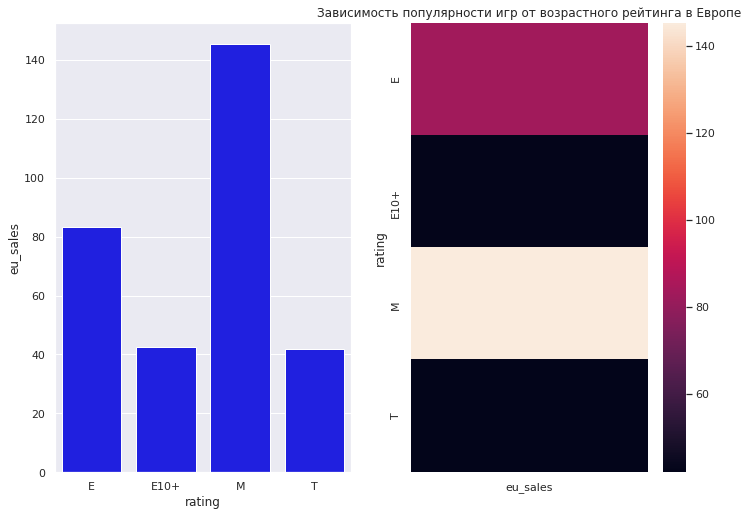

In [80]:
eu_sales_rating = data.query('year_of_release > 2012 and rating != "unknow_rating"').pivot_table(
        index='rating', values='eu_sales', aggfunc='sum')

sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(1, 2, 1)
sns.barplot(y = 'eu_sales', x=eu_sales_rating.index,  data=eu_sales_rating, color='blue')
plt.subplot(1, 2, 2)
sns.heatmap(eu_sales_rating)
plt.title('Зависимость популярности игр от возрастного рейтинга в Европе')

Text(0.5, 1.0, 'Зависимость популярности игр от возрастного рейтинга в Японии')

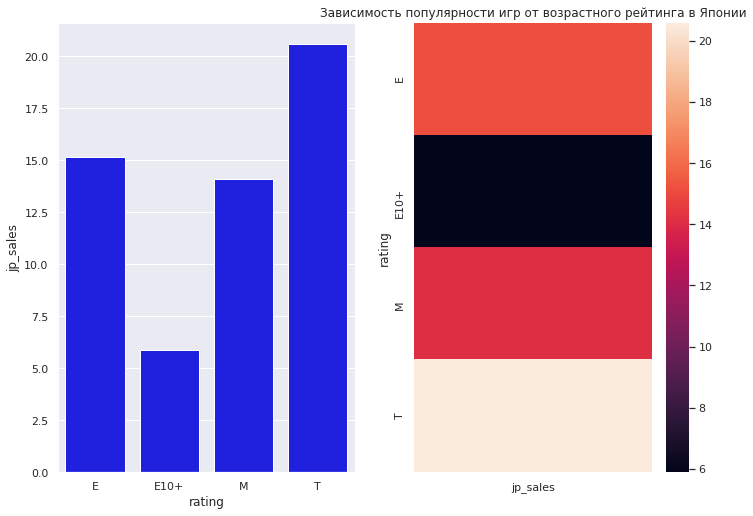

In [81]:
jp_sales_rating = data.query('year_of_release > 2012 and rating != "unknow_rating"').pivot_table(
        index='rating', values='jp_sales', aggfunc='sum')

sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(1, 2, 1)
sns.barplot(y = 'jp_sales', x=jp_sales_rating.index,  data=jp_sales_rating, color='blue')
plt.subplot(1, 2, 2)
sns.heatmap(jp_sales_rating)
plt.title('Зависимость популярности игр от возрастного рейтинга в Японии')

В Европе и Северной Америке чаще играют в поекты, которые могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику (рейтинг M), тогда как в Японии наиболее популярны подростковые игры (T-рейтинг), при этом в Европе и Северной Америке игры этого рейтинга слабо продаются.

Вывод: рынки Европы и Северной Америки имеют свои особенности, однако в целом похожи. Рынок Японии очень специфичен, там наиболее популярны портативные консоли и игры с низким возрастным рейтингом.

## Проверим гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

```
H_0: Средние пользовательские рейтинги (user_score) пользователей "PC" = (user_score) пользователей "XOne"
H_a: Средние пользовательские рейтинги (user_score) пользователей "PC" ≠ (user_score) пользователей "XOne"
alpha = 0.05
```

In [82]:
xbox_one_mean = data[(data['platform'] =='XOne')&(data['user_score'] != 0.0)]['user_score']
pc_mean = data[(data['platform'] =='PC')&(data['user_score'] != 0.0)]['user_score']
results = st.ttest_ind(xbox_one_mean, pc_mean, equal_var = False)

alpha = .05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.935072360183574e-06
Отвергаем нулевую гипотезу


### Средние пользовательские рейтинги жанров Action  и Sports разные.

```
H_0: Средние пользовательские рейтинги (user_score) жанров "Action" ≠ (user_score)  жанров "Sports"
H_a: Средние пользовательские рейтинги (user_score) жанров "Action" = (user_score)  жанров "Sports"
alpha = 0.05
```

In [83]:
action_mean = data[(data['genre'] =='Action')&(data['user_score'] != 0.0)]['user_score']
sport_mean = data[(data['genre'] =='Sports')&(data['user_score'] != 0.0)]['user_score']
results = st.ttest_ind(action_mean, sport_mean, equal_var = False)

alpha = .05

print('p-значение:', results.pvalue)

if results.pvalue > alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11483818791498286
Отвергаем нулевую гипотезу


Мы проверили обе гипотезы, в результате обе были отвергнуты. 

# Вывод: 
Срок жизни большинства консолей составляет 6-8 лет, исключение PC. С 2009 года продолжается спад индустрии игр.  Рынки Европы и Северной Америки имеют свои особенности, однако в целом похожи. Рынок Японии очень специфичен, там наиболее популярны портативные консоли и игры с низким возрастным рейтингом. Продажи игр слабо коррелируют с пользовательскими оценками, при принятии решения о покупке игры пользователь больше ориентируется на оценку критиков. Самым прибыльным является жанр Action, жанр спортвных игр является третьим по популярности жанром в Европе и Северной Америке, при этом средние пользовательские рейтинги этих жанров одинаковые.
